In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.15
percent = 30#20
step = 100
k = 50
k_s = 5

In [3]:
base = '/home/god/Documentos/tcc/datasets/1CSurr.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt, gmm = hs.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent, k)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
percent = 10
poolsize = int( len(dataset_train)/100 * percent )

startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features, k_s)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

/home/god/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [6]:
acc_percent, f1_per, mcc_per = metrics.makeBatches(l_stream, predicted, len(stream), step)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')

acc_percentScargc, f1_S, mcc_S = metrics.makeBatches(l_stream, predictedS, len(stream), step)
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, step, f1_type = 'macro')

Tempo de Execução:  3419.3953630924225
memory peak:  155416
Acc:  0.715012104689204
Macro-F1:  0.7139145903711892
MCC:  0.4915736085933165
Desvio Padrão:  0.18726387687917842
Numero de atualizações:  11217


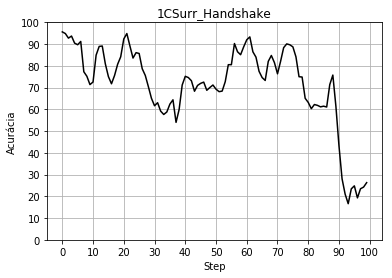

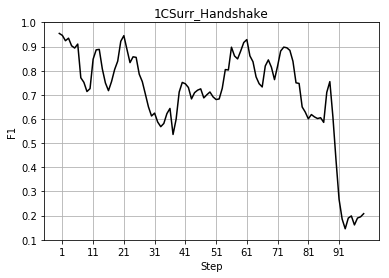

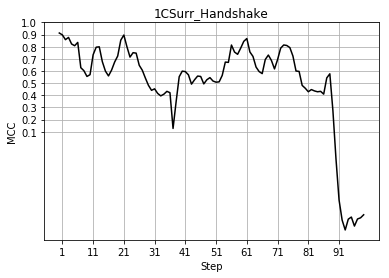

Tempo de Execução:  30.197787284851074
memory peak:  197420
Acc:  0.8038928026172302
Macro-F1:  0.7994519173346832
MCC:  0.6231136881042499
Desvio Padrão:  0.20653800967258742
Numero de atualizações:  190


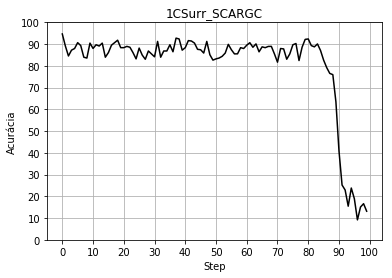

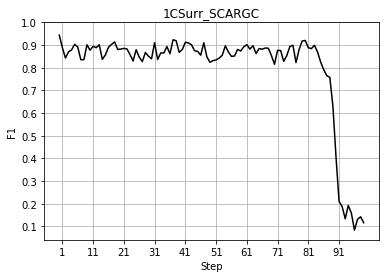

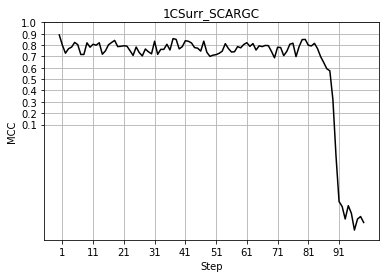

/home/god/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


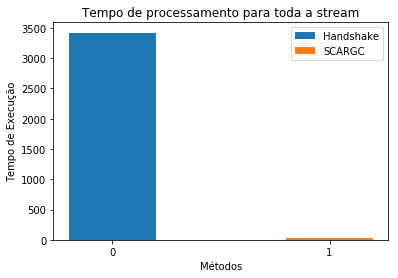

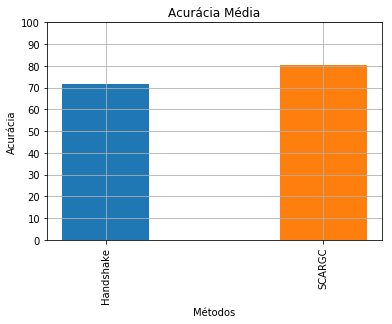

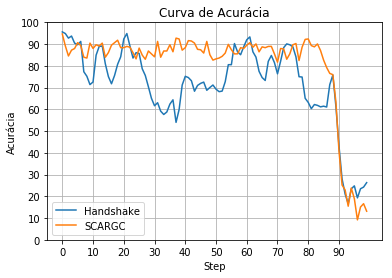

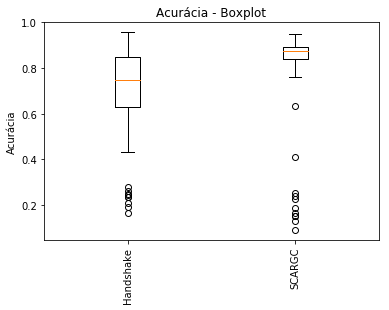

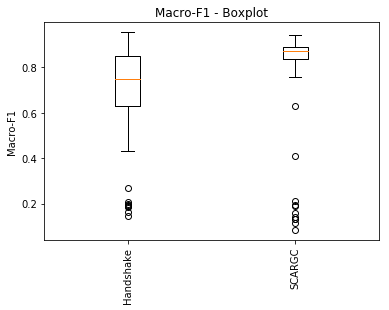

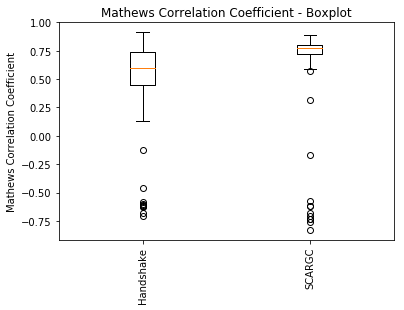

In [7]:
print('Tempo de Execução: ', tempo)
print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
plots.plotAcc(acc_percent, 100, '1CSurr_Handshake')
plots.plotF1(f1_per, 100, '1CSurr_Handshake')
plots.plotMCC(mcc_per, 100, '1CSurr_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, '1CSurr_SCARGC')
plots.plotF1(f1_S, 100, '1CSurr_SCARGC')
plots.plotMCC(mcc_S, 100, '1CSurr_SCARGC')

listTime = [tempo, tempoS]
listAcc = [score, scoreS]
listMethod = ['Handshake', 'SCARGC']
matrixAcc = [acc_percent[0], acc_percentScargc[0]]
matrixF1 = [f1_per[0], f1_S[0]]
matrixMcc = [mcc_per[0], mcc_S[0]]


plots.plotTime(listTime, listMethod)
plots.plotAverageAcc(listAcc, listMethod)
plots.plotAccuracyCurves(matrixAcc, listMethod, step)
plots.plotBoxplot('acc', matrixAcc, listMethod)
plots.plotBoxplot('f1', matrixF1, listMethod)
plots.plotBoxplot('mcc', matrixMcc, listMethod)

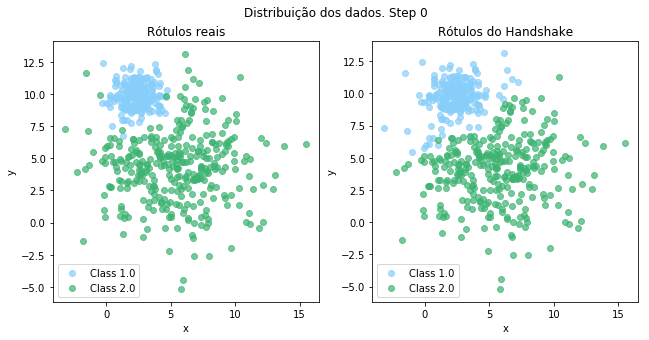

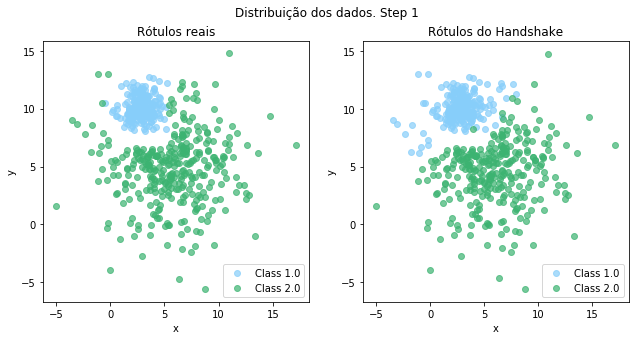

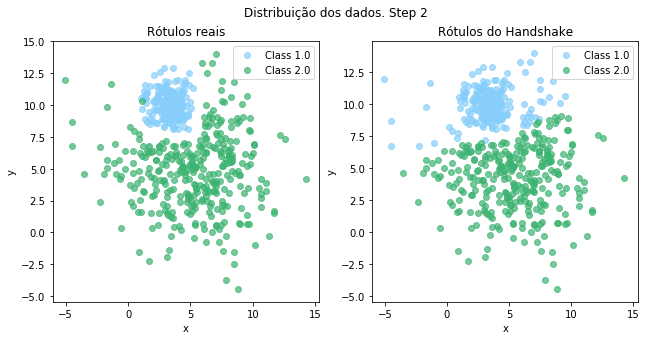

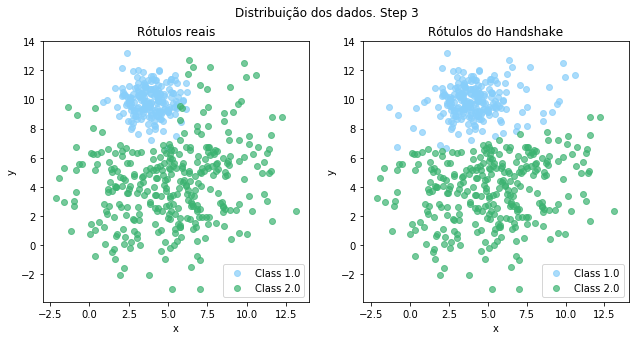

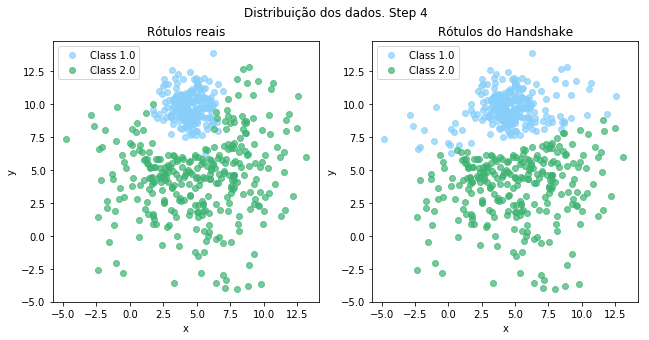

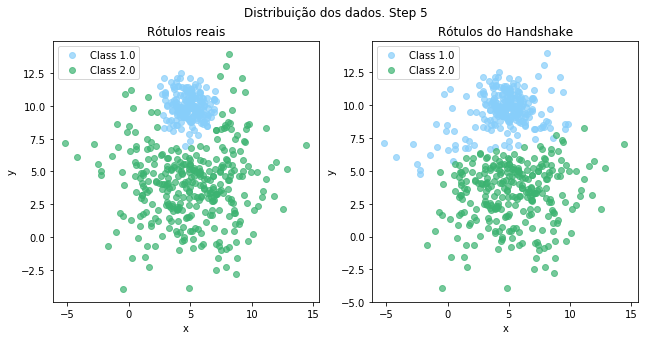

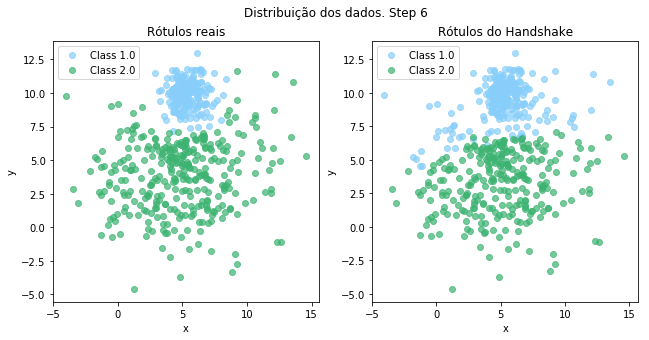

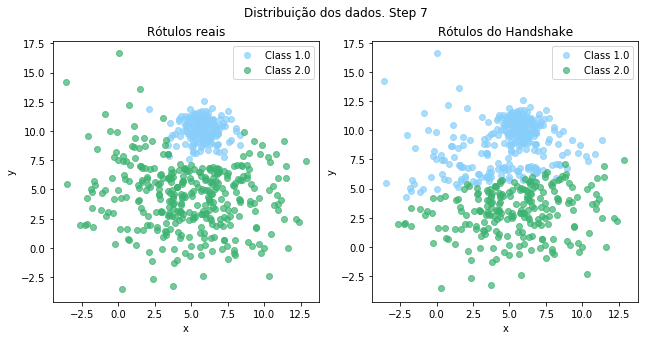

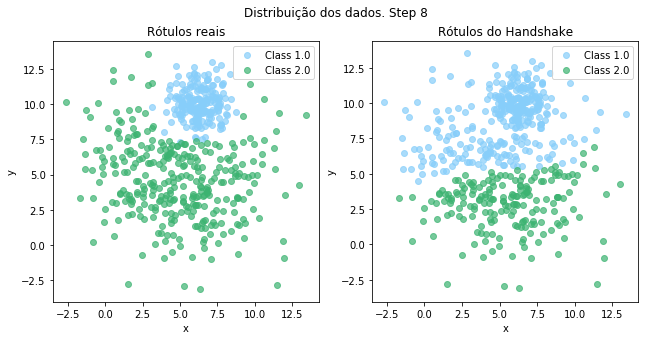

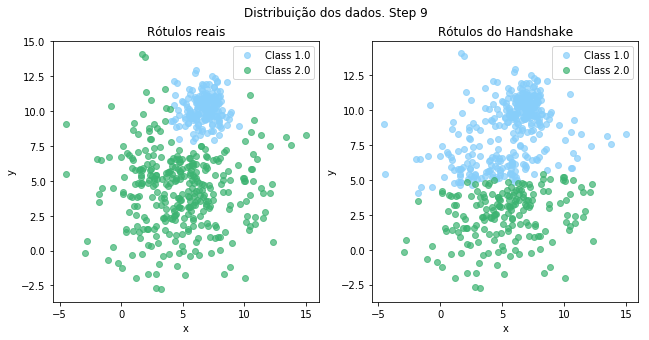

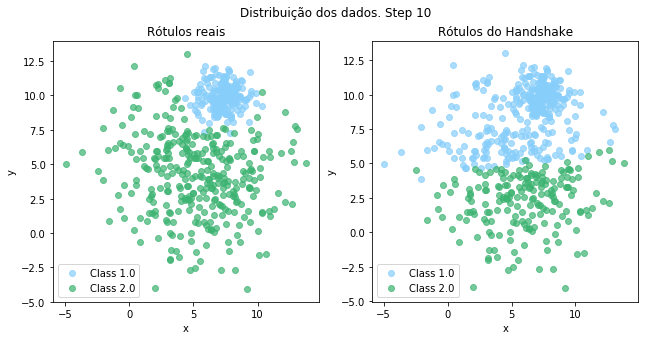

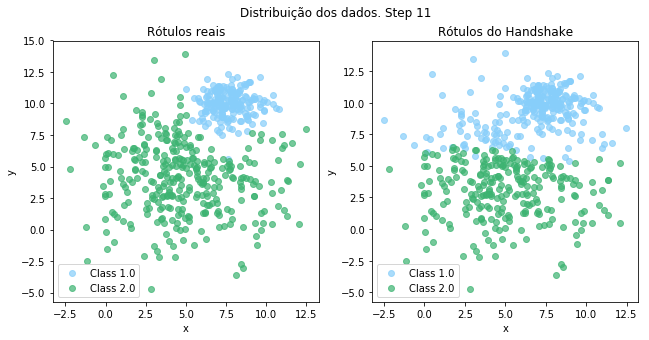

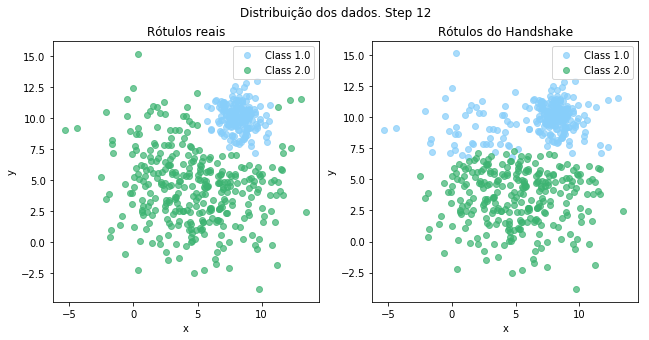

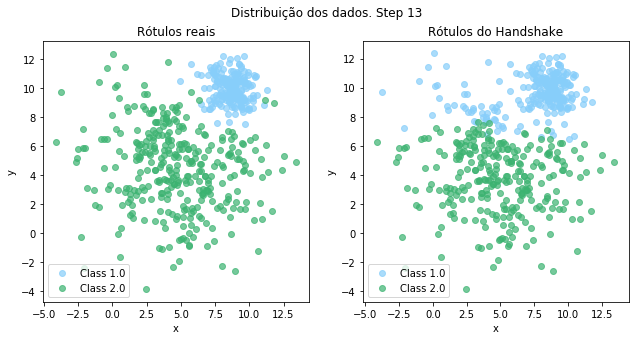

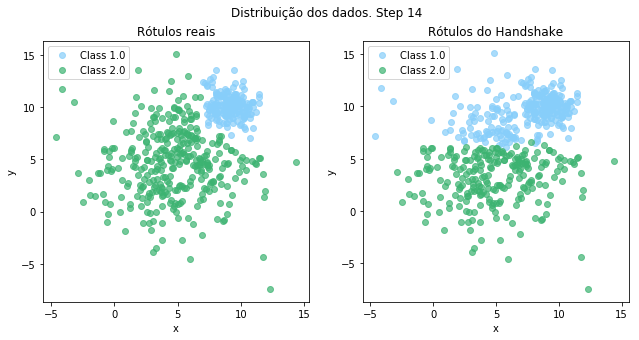

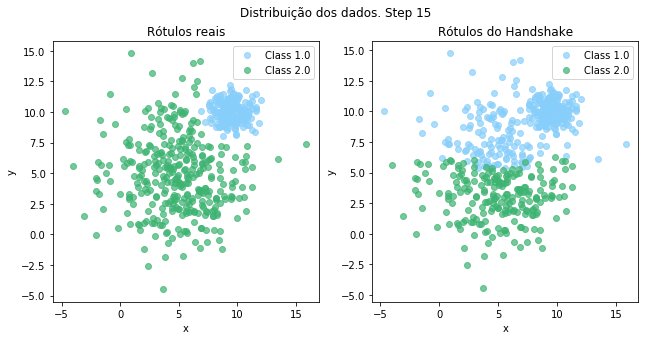

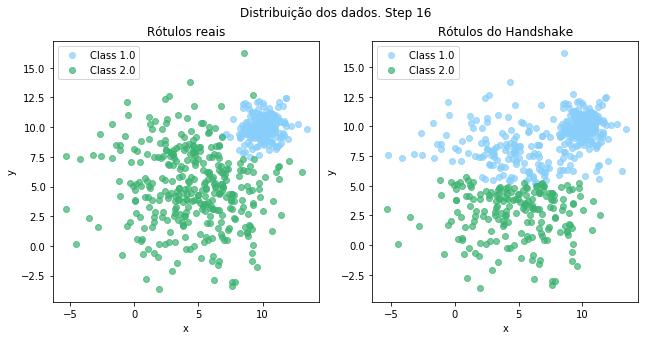

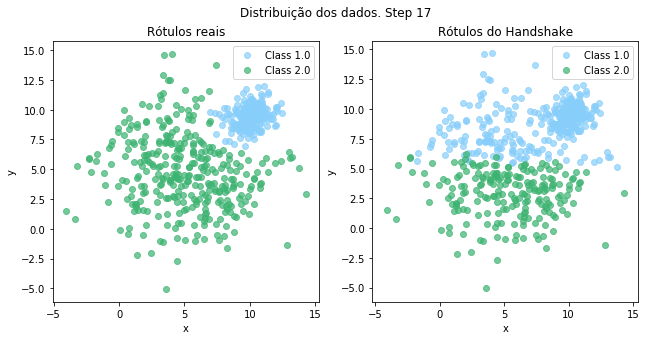

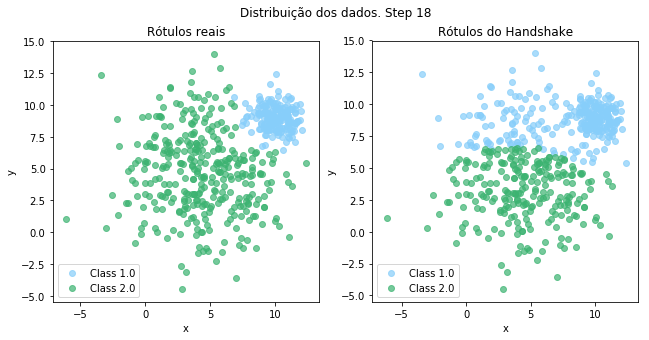

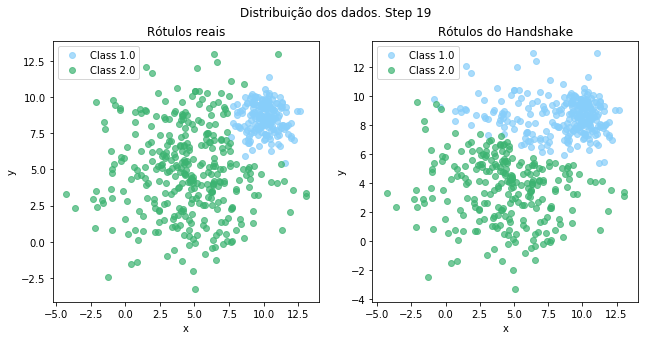

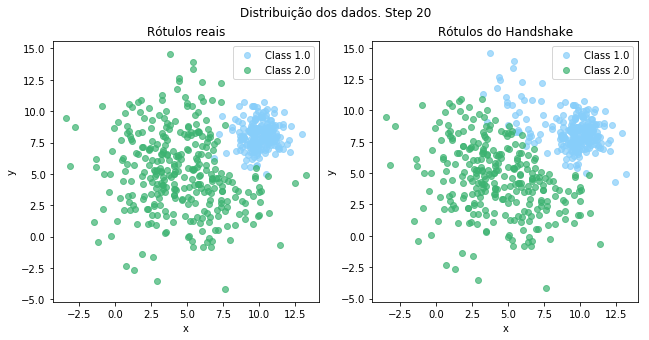

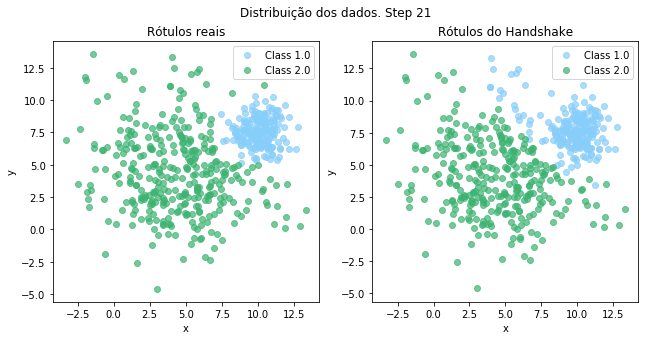

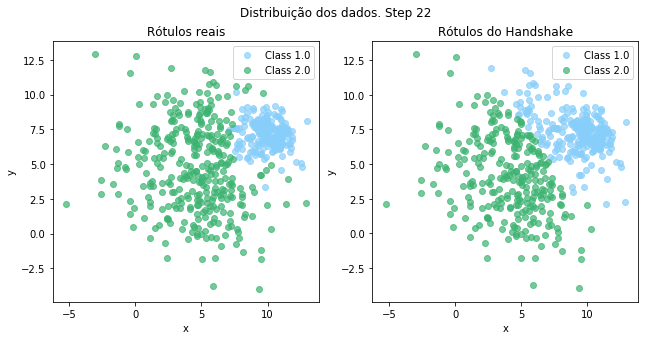

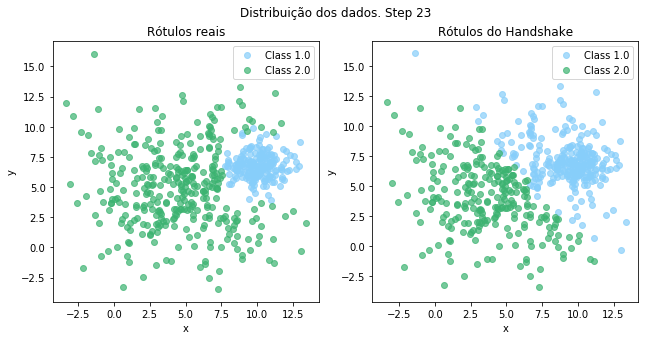

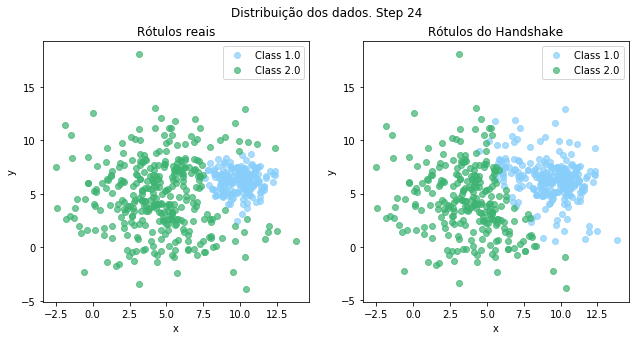

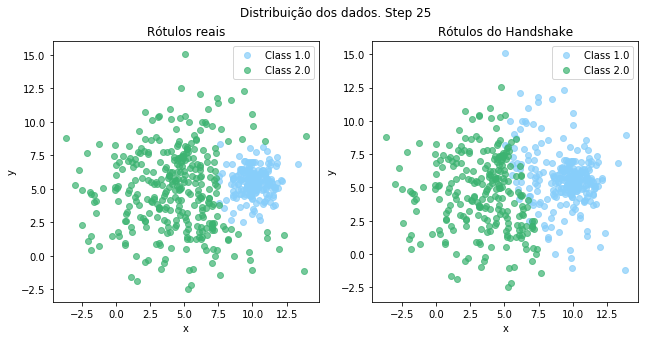

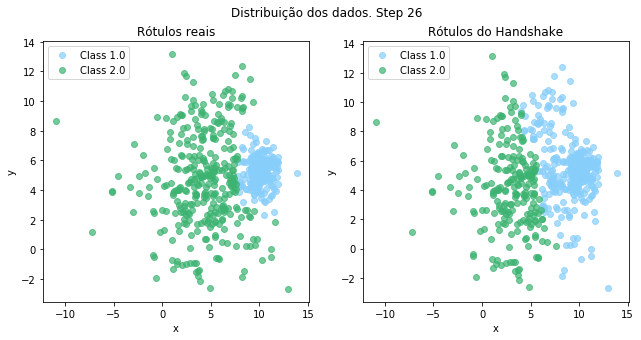

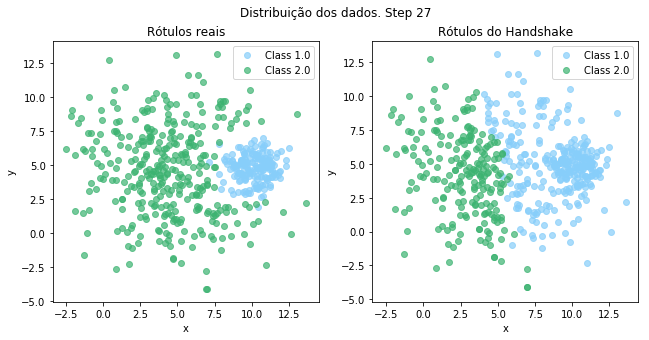

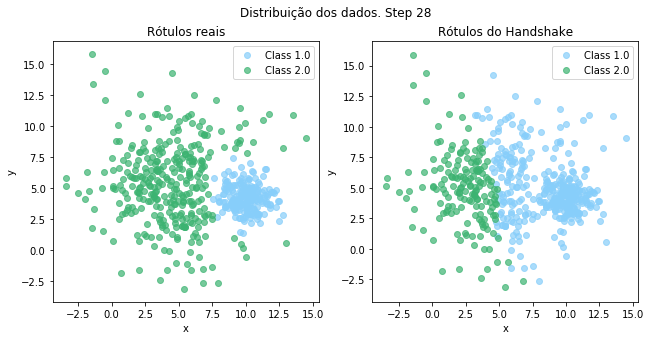

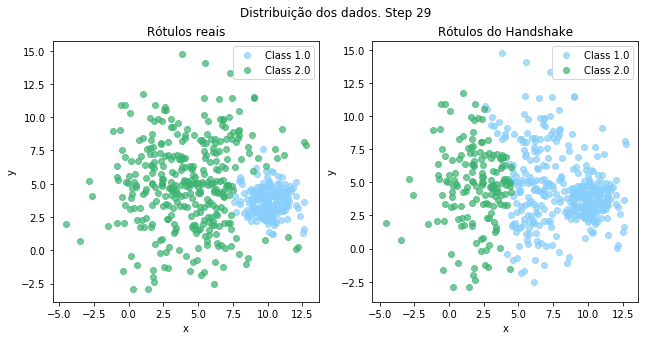

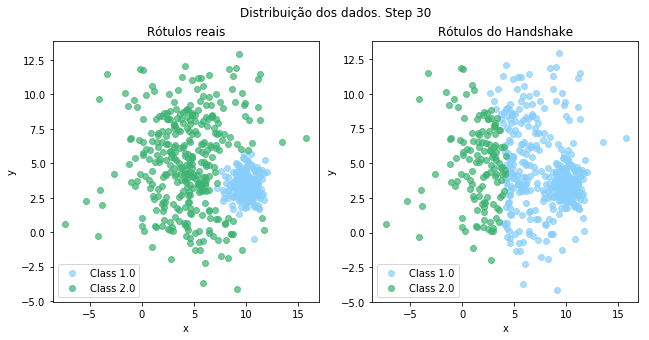

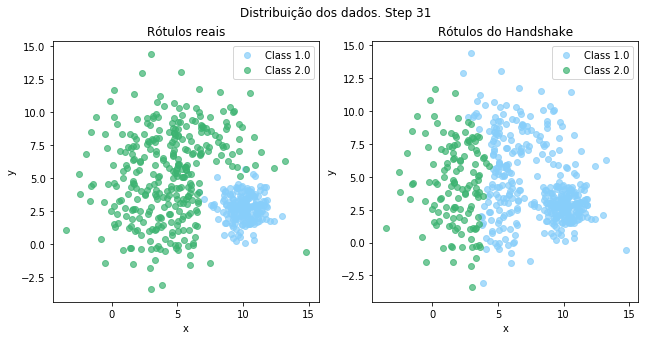

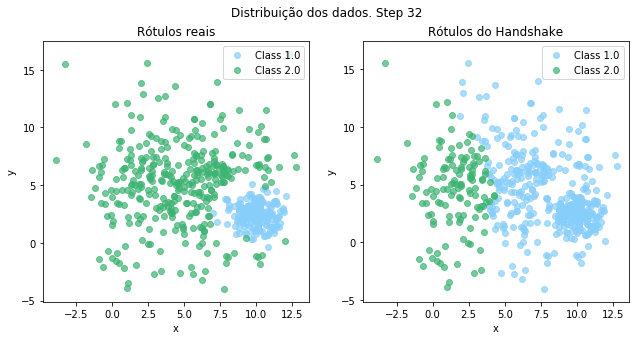

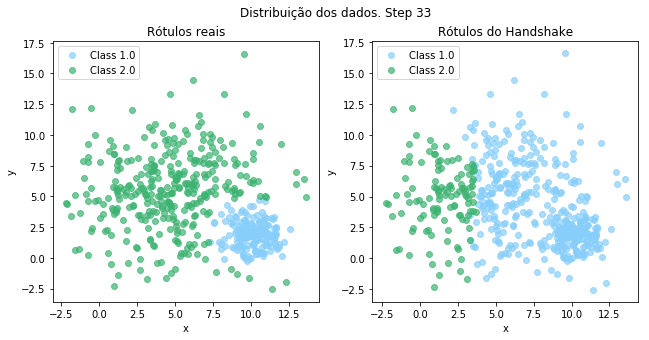

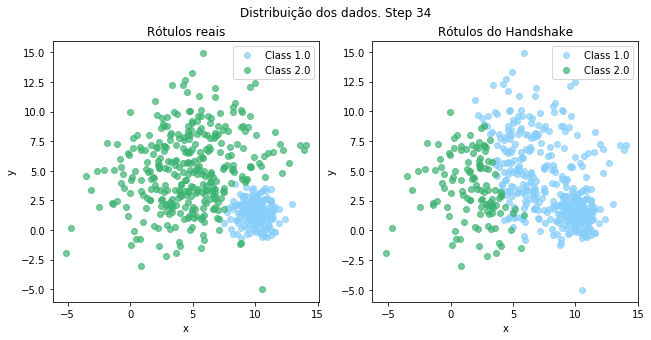

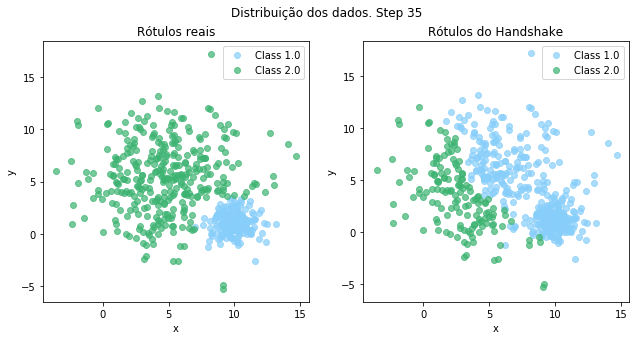

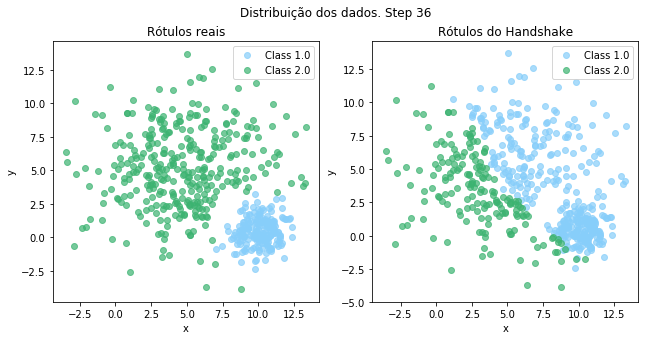

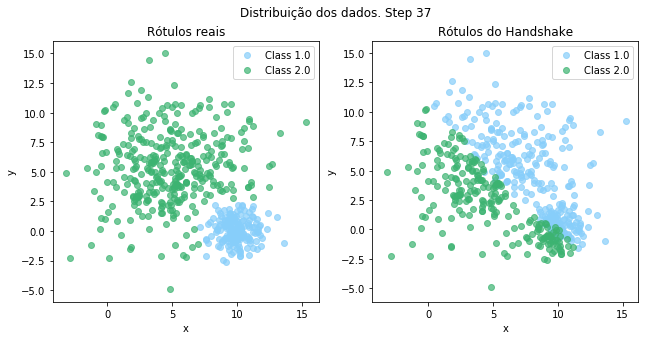

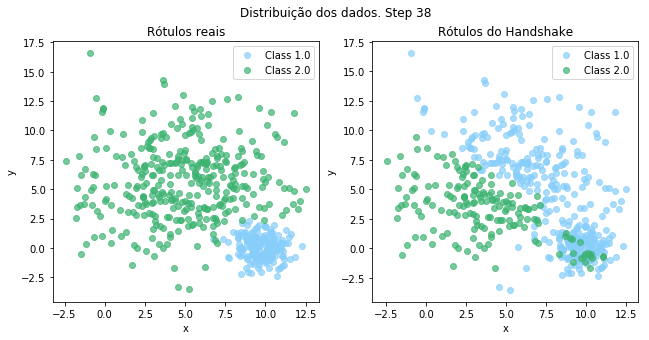

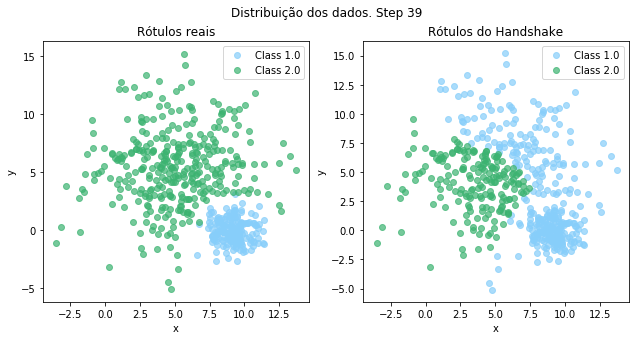

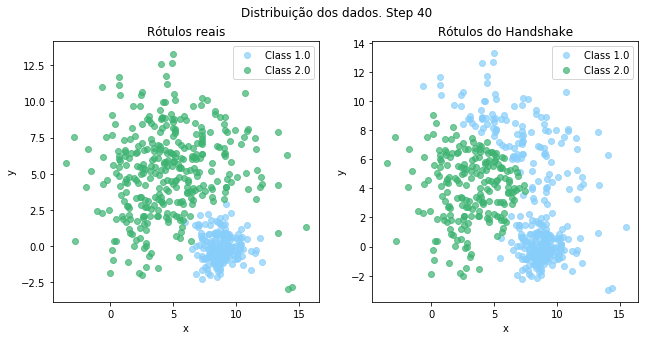

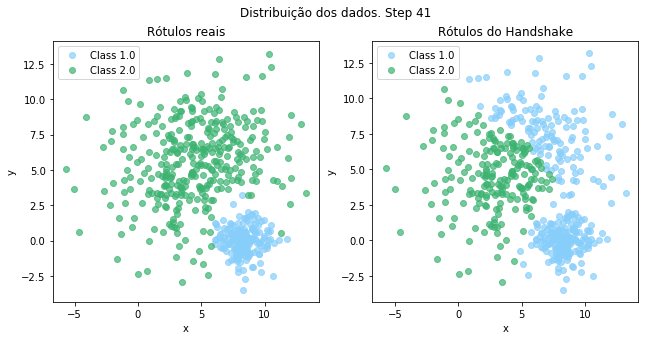

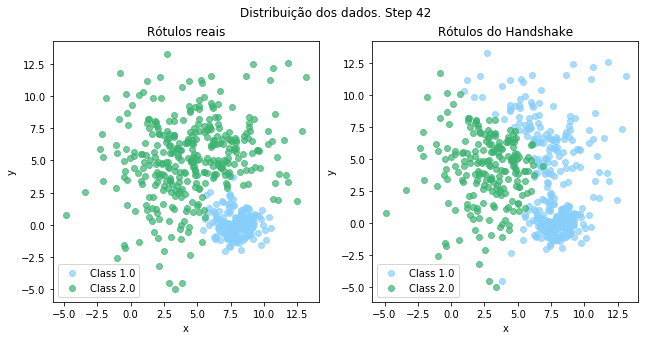

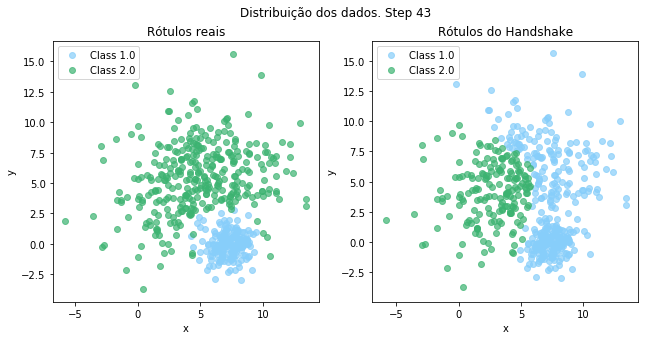

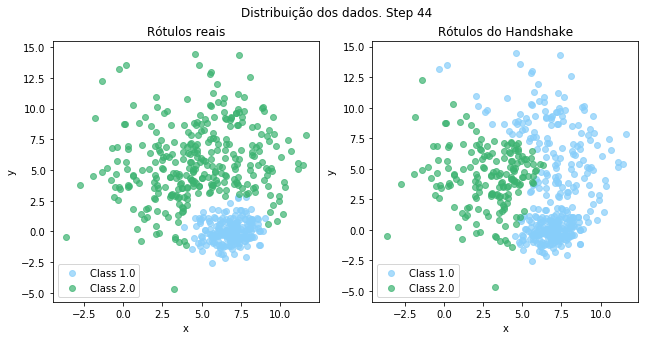

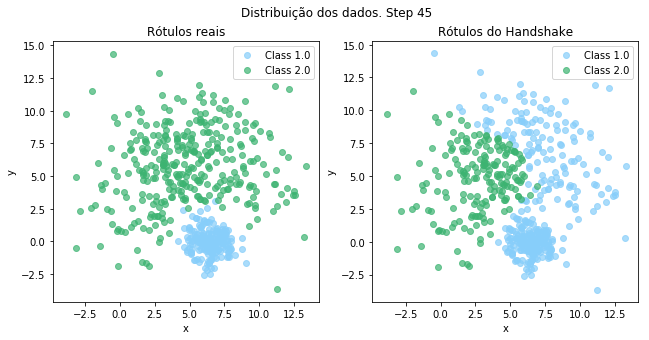

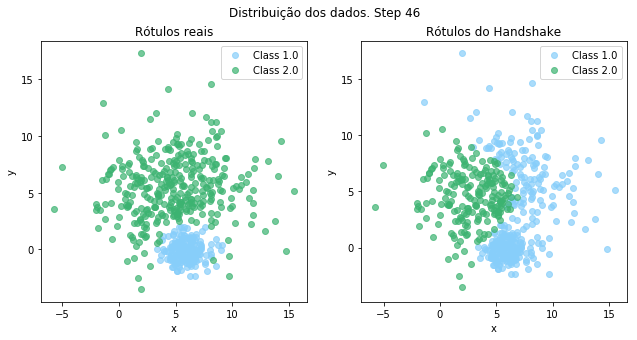

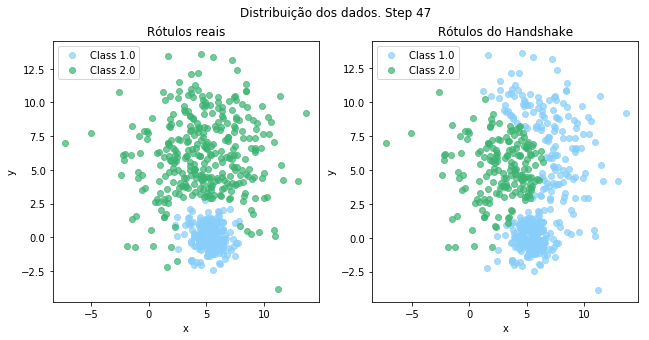

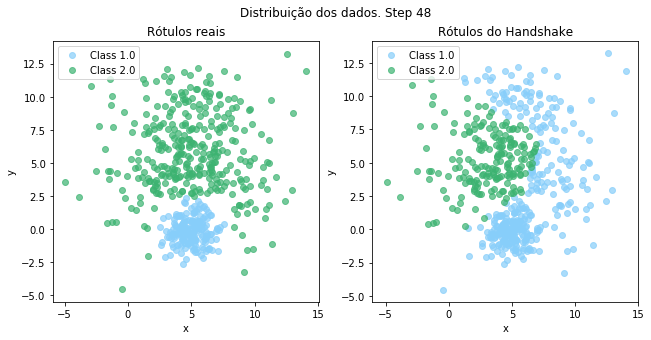

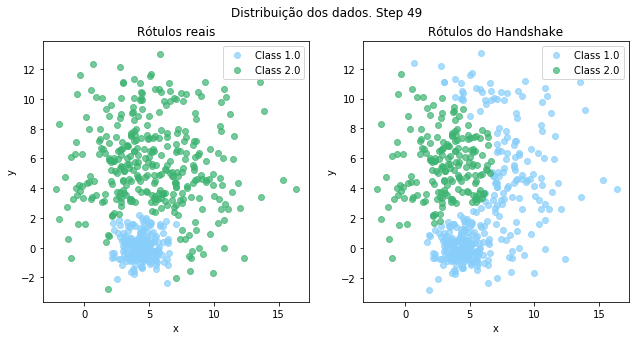

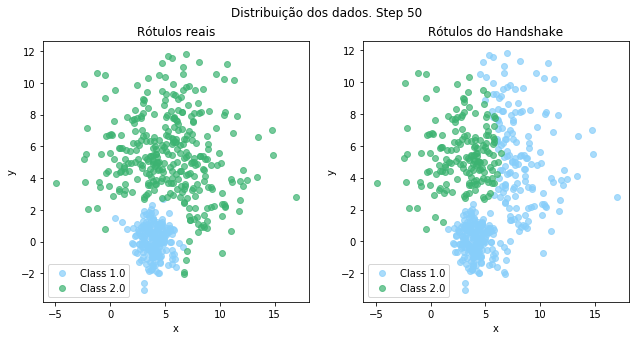

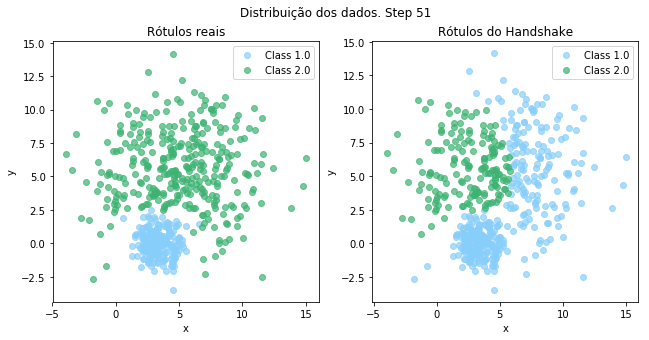

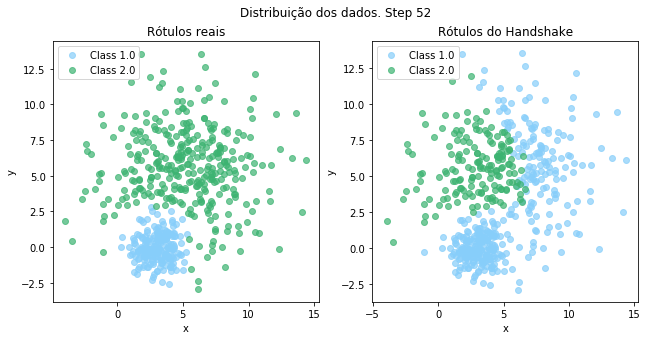

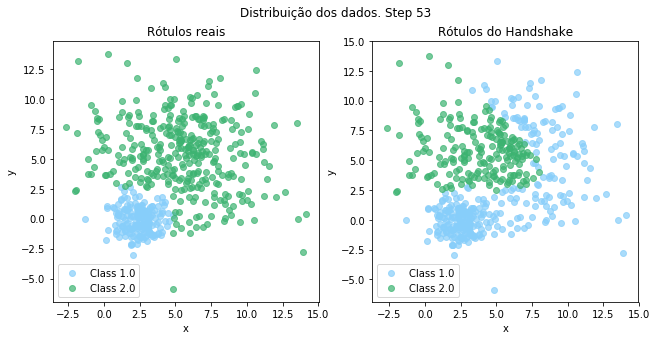

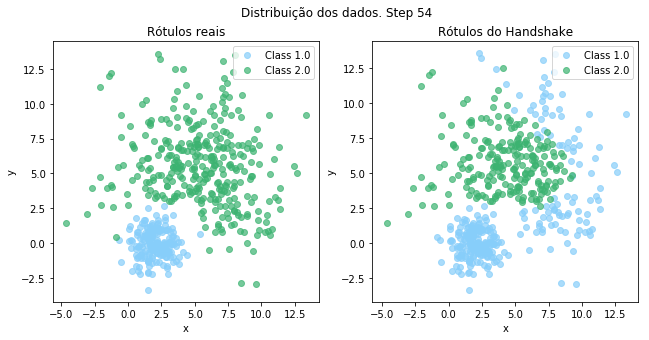

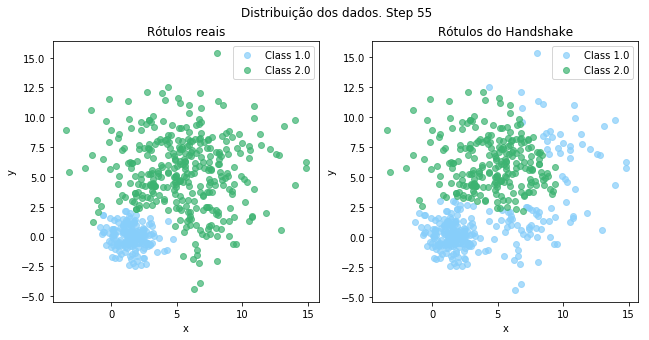

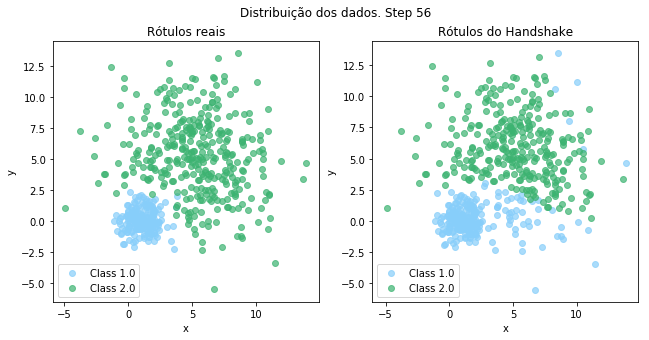

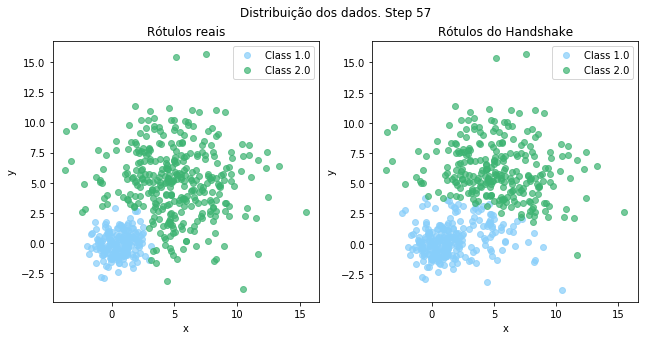

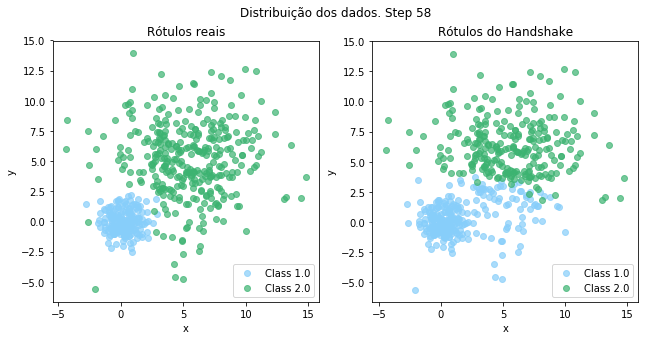

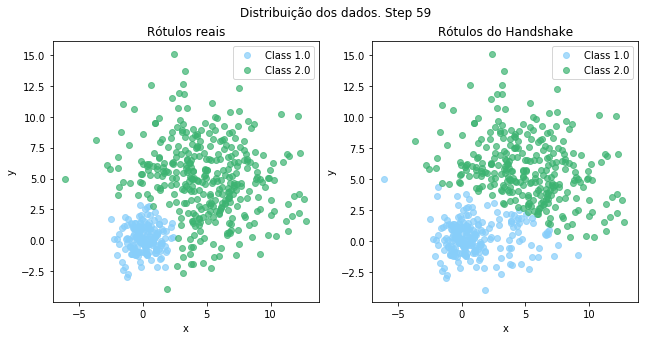

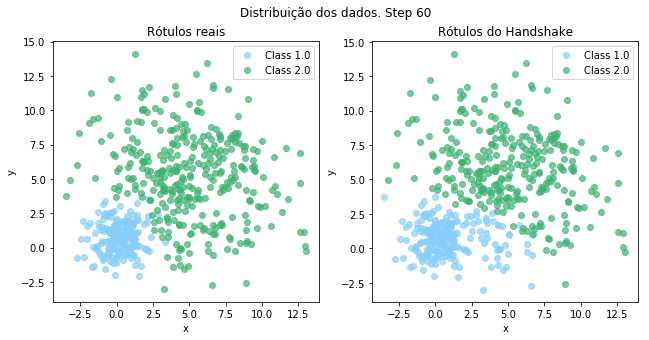

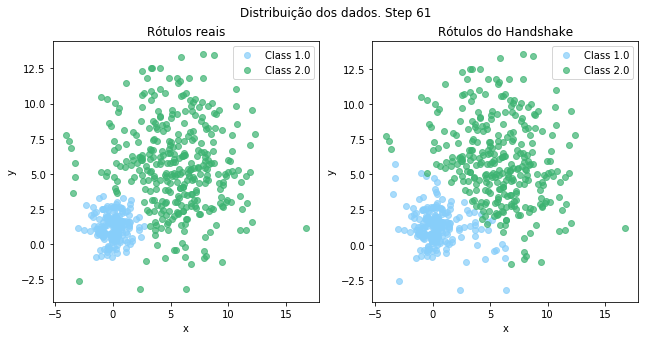

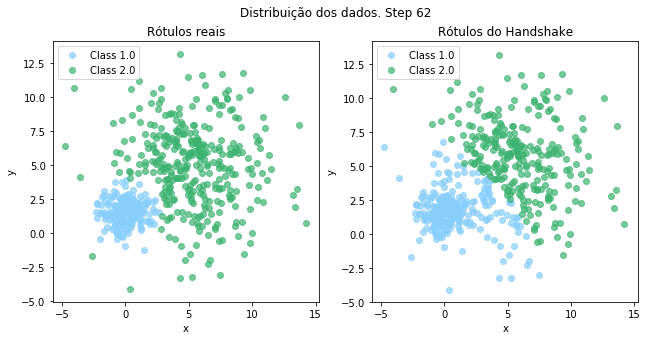

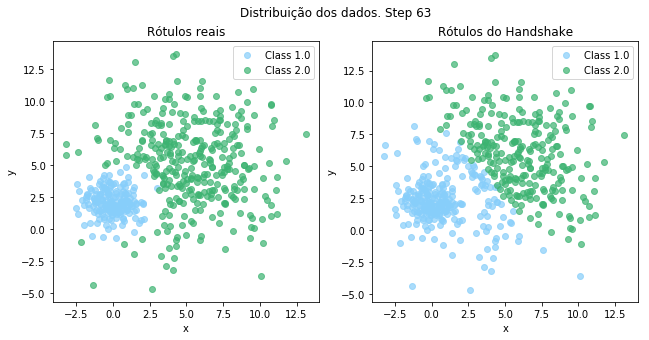

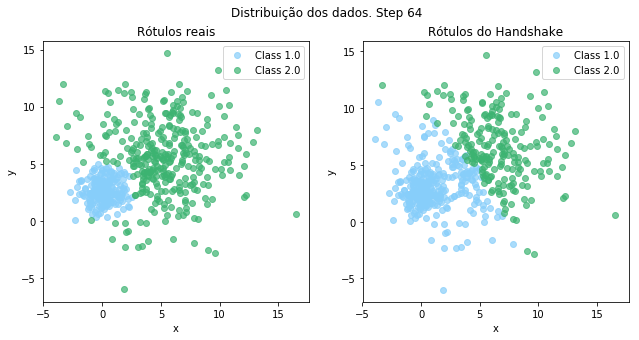

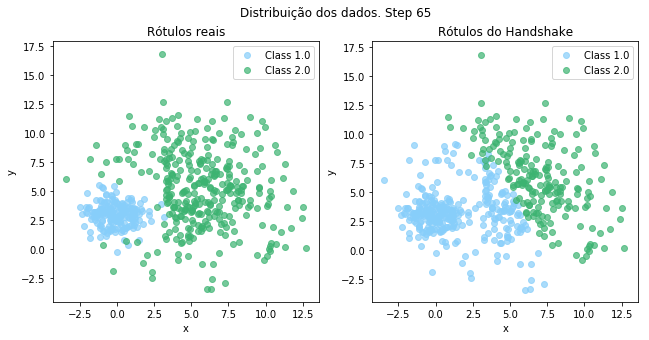

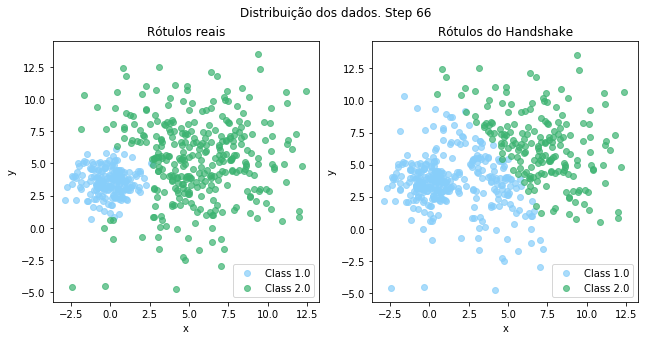

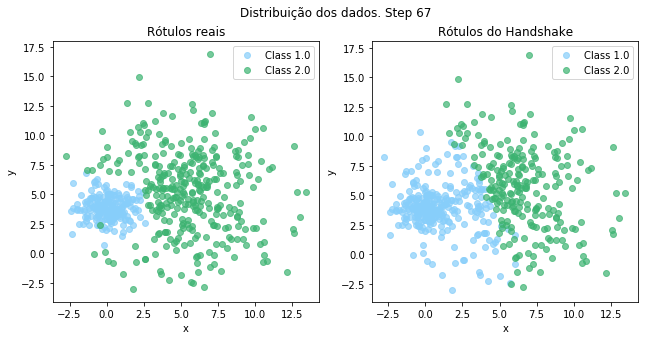

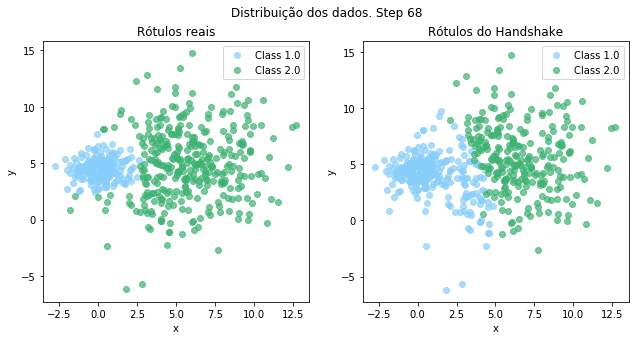

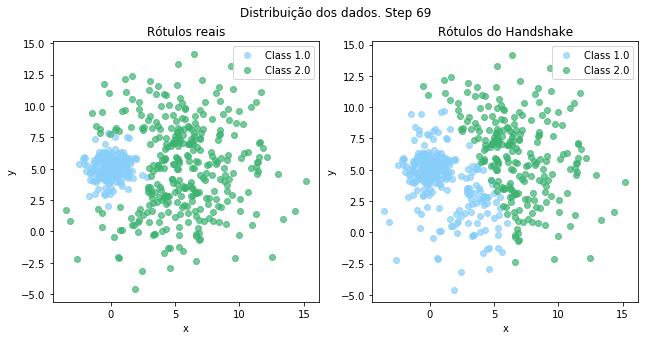

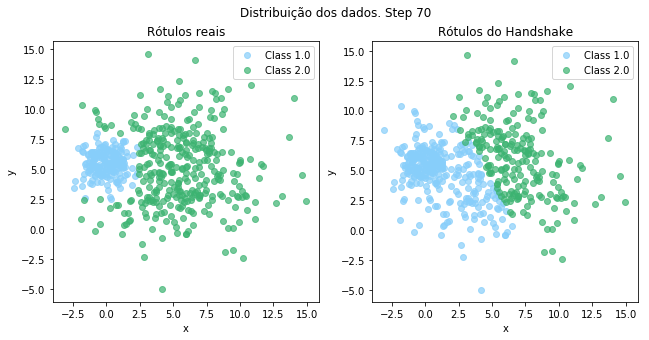

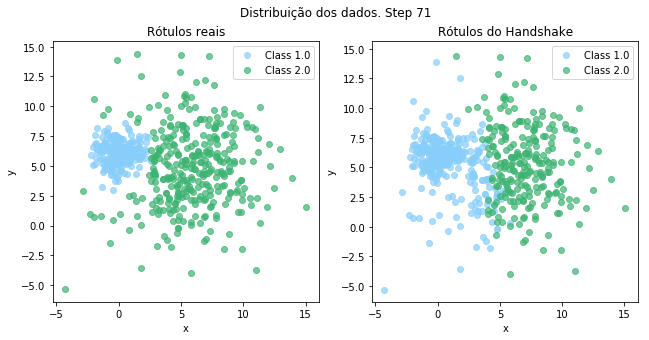

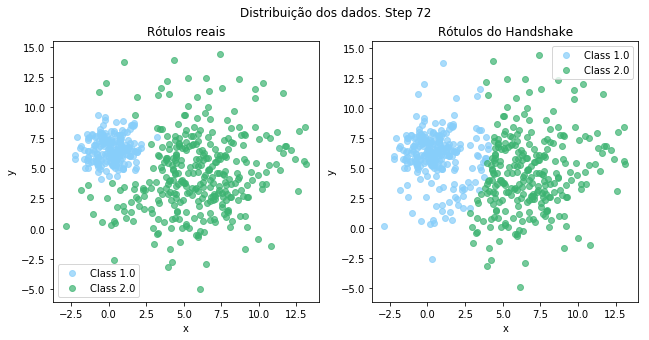

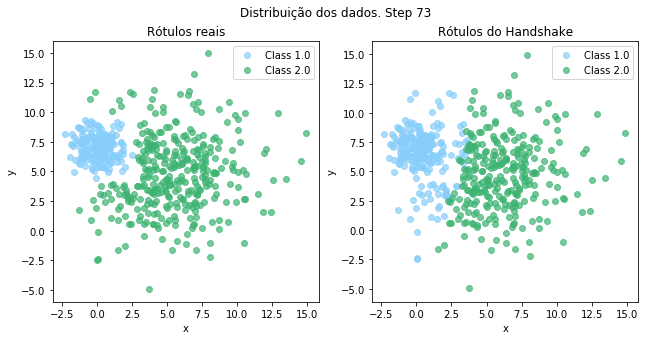

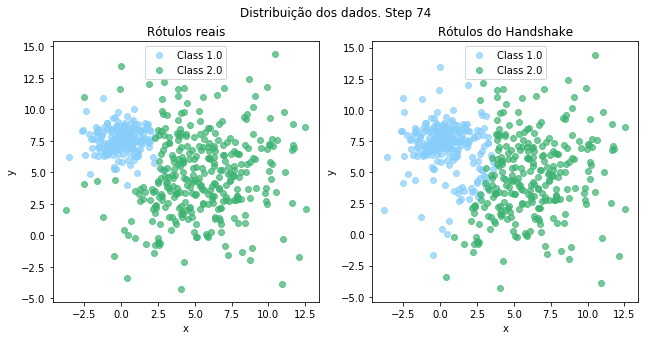

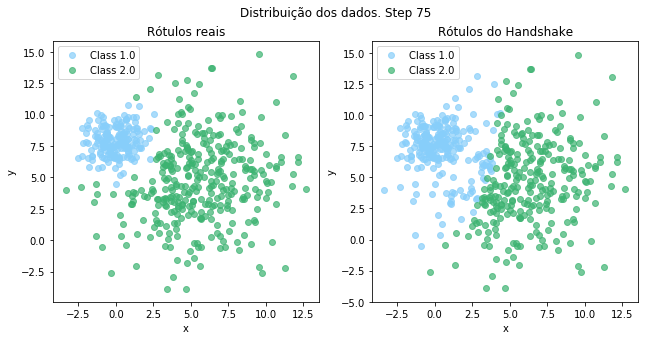

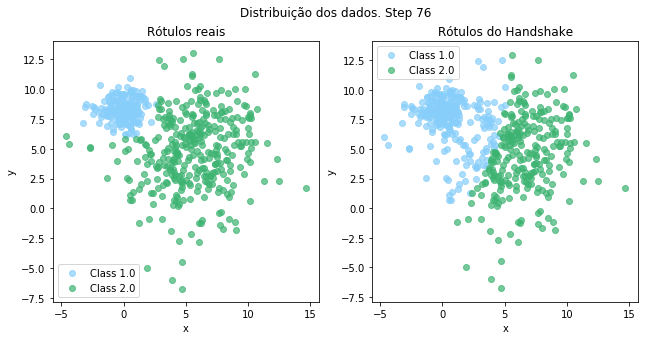

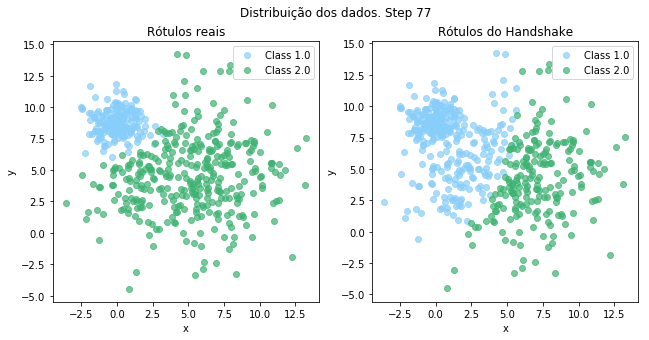

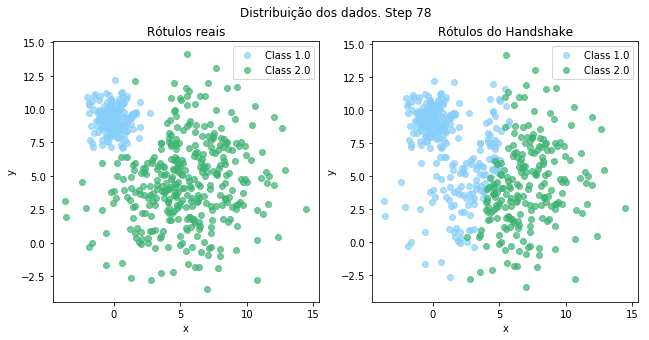

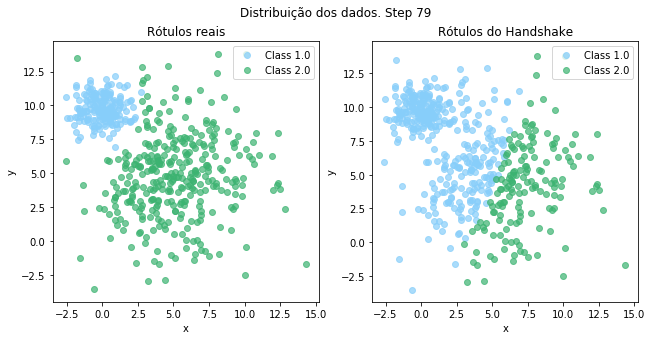

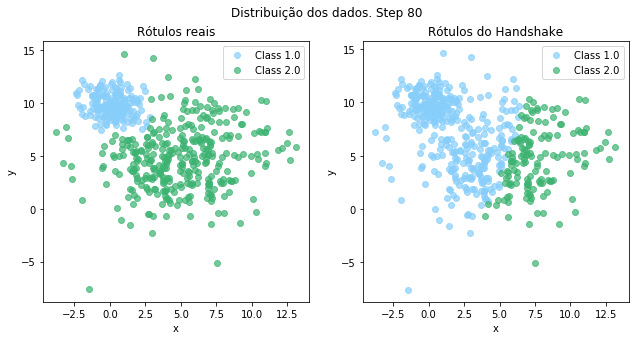

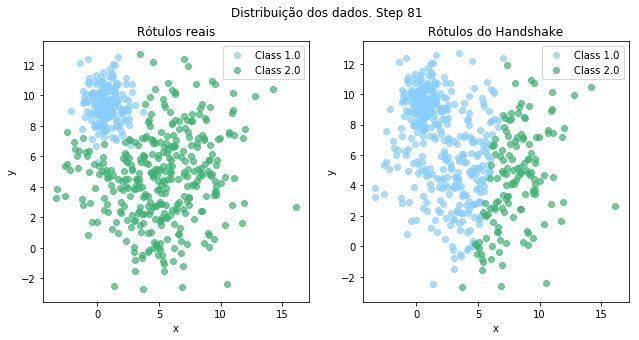

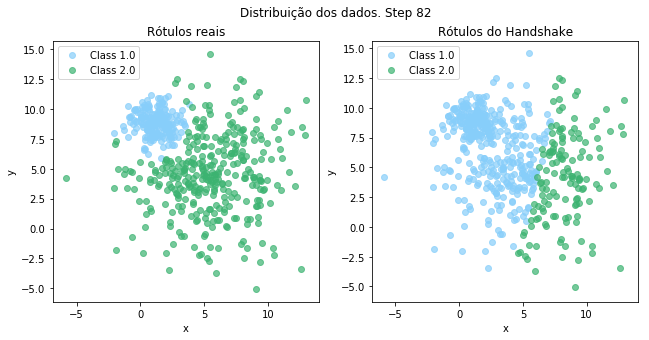

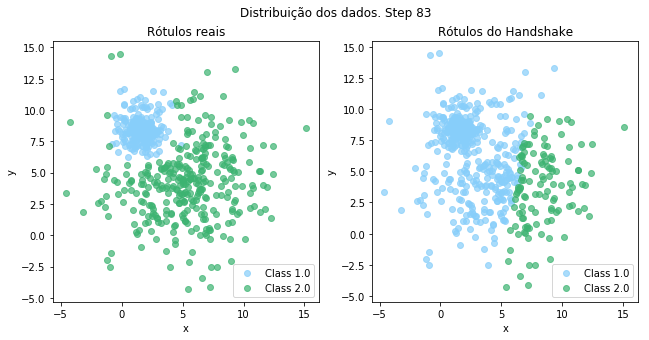

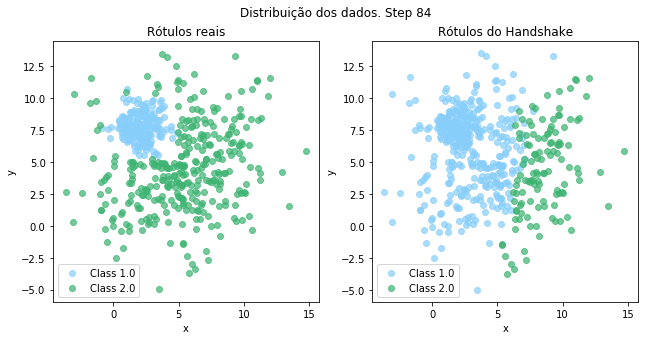

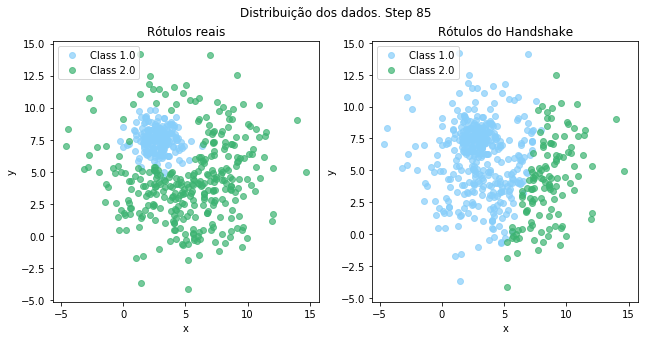

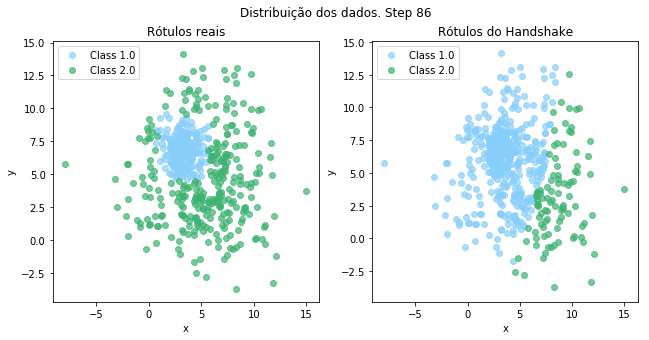

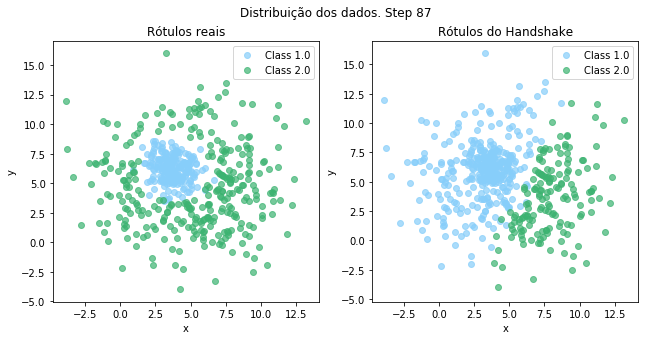

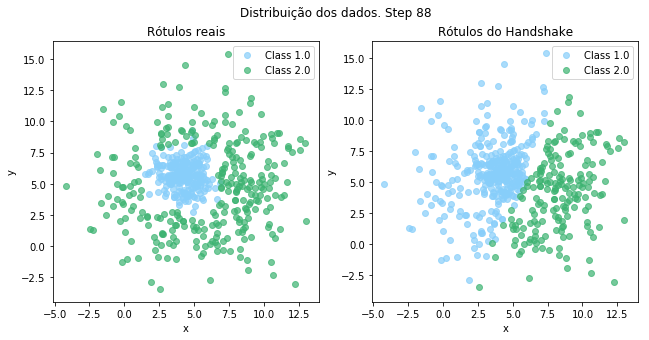

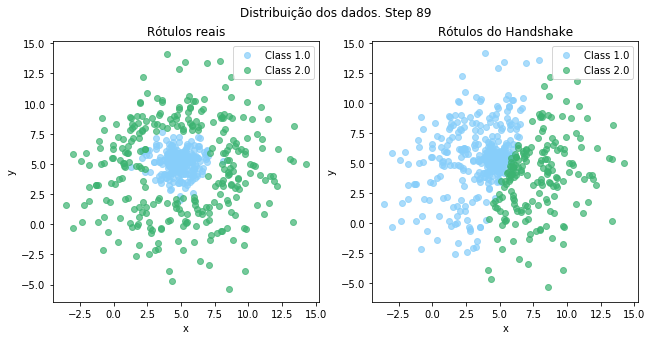

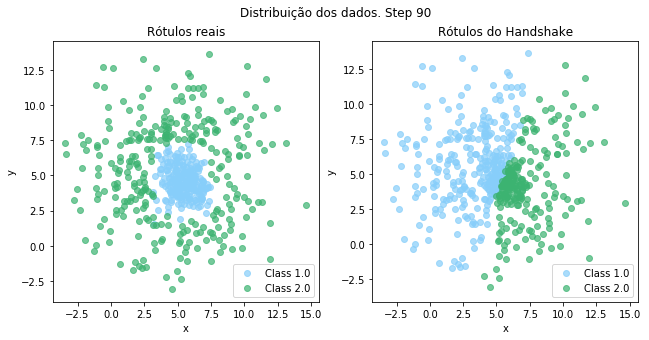

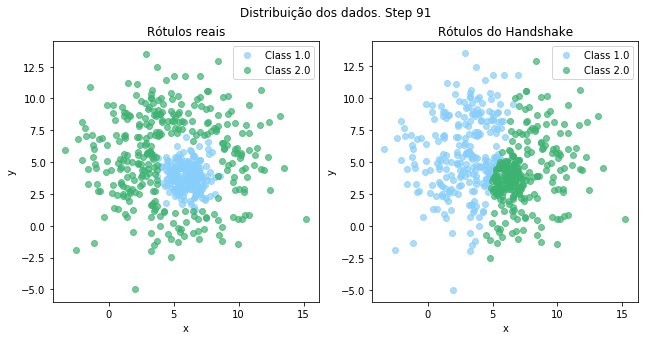

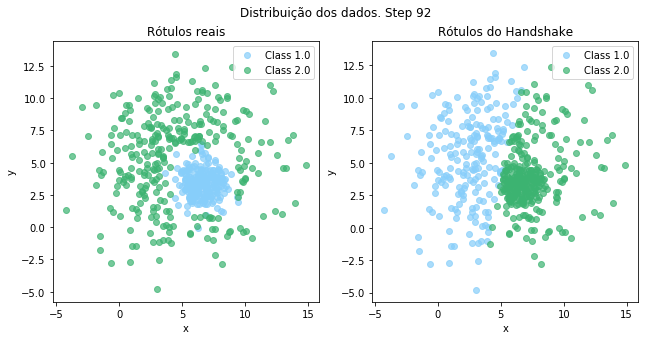

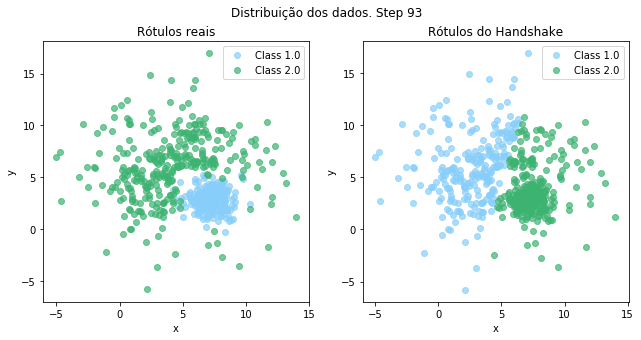

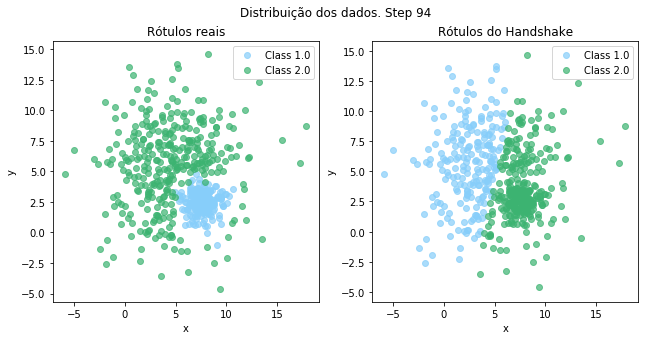

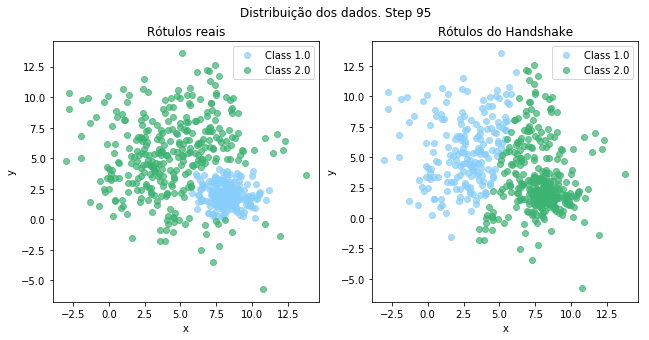

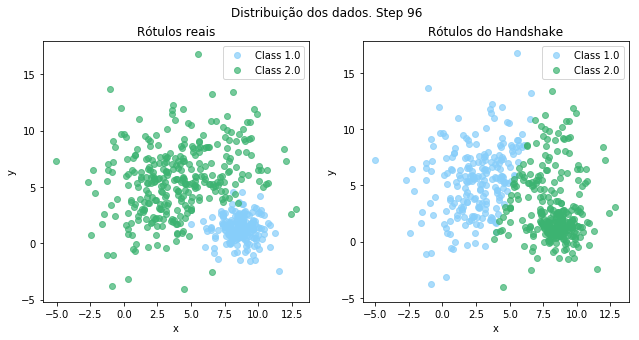

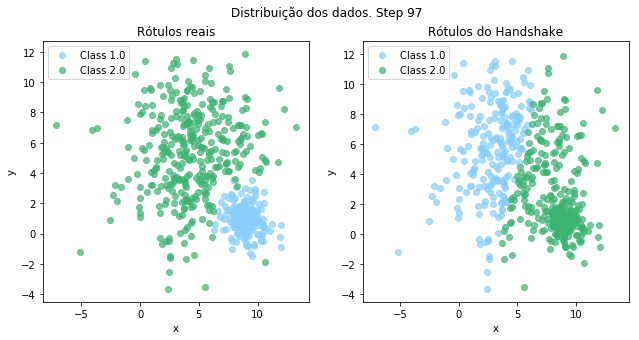

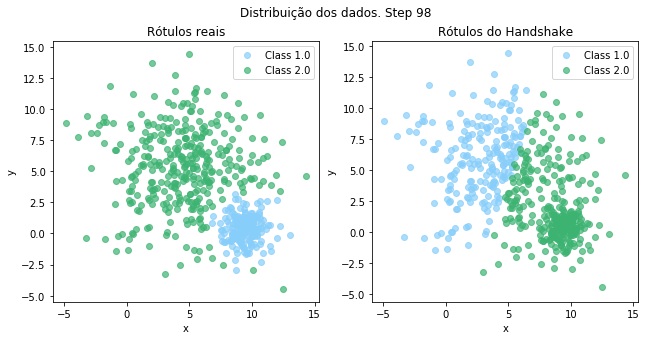

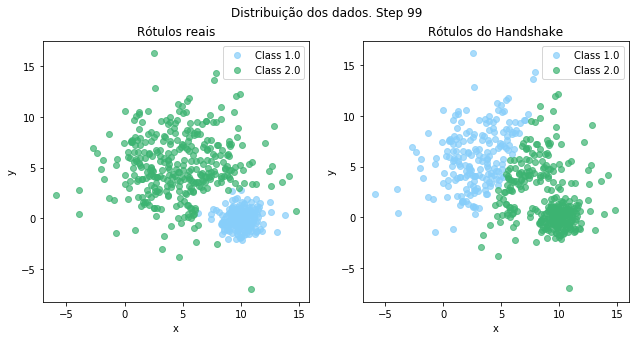

In [8]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), step)

In [9]:
print(acc_percent, f1_per, mcc_per)

[[0.95619048 0.94847328 0.92748092 0.9370229  0.90458015 0.89714286
  0.91221374 0.77290076 0.7519084  0.71374046 0.72571429 0.84923664
  0.88931298 0.89122137 0.80916031 0.75047619 0.71755725 0.75572519
  0.80725191 0.84160305 0.92366412 0.94857143 0.89122137 0.83587786
  0.86068702 0.85687023 0.78666667 0.75572519 0.70419847 0.65076336
  0.61641221 0.63047619 0.59160305 0.57633588 0.58778626 0.6240458
  0.64380952 0.54007634 0.59923664 0.71183206 0.7519084  0.74618321
  0.73142857 0.68320611 0.70992366 0.71946565 0.72519084 0.68761905
  0.70038168 0.71183206 0.69274809 0.68129771 0.68380952 0.72709924
  0.80534351 0.80534351 0.90267176 0.8647619  0.85114504 0.88740458
  0.91984733 0.93320611 0.86450382 0.84       0.77480916 0.74618321
  0.73282443 0.82061069 0.84761905 0.8148855  0.76335878 0.82061069
  0.88358779 0.90095238 0.89694656 0.88740458 0.84160305 0.75
  0.74857143 0.65076336 0.63167939 0.60305344 0.6221374  0.61832061
  0.61142857 0.61450382 0.61068702 0.71374046 0.7576335

In [10]:
print(matrixAcc, matrixF1, matrixMcc)

[array([0.95619048, 0.94847328, 0.92748092, 0.9370229 , 0.90458015,
       0.89714286, 0.91221374, 0.77290076, 0.7519084 , 0.71374046,
       0.72571429, 0.84923664, 0.88931298, 0.89122137, 0.80916031,
       0.75047619, 0.71755725, 0.75572519, 0.80725191, 0.84160305,
       0.92366412, 0.94857143, 0.89122137, 0.83587786, 0.86068702,
       0.85687023, 0.78666667, 0.75572519, 0.70419847, 0.65076336,
       0.61641221, 0.63047619, 0.59160305, 0.57633588, 0.58778626,
       0.6240458 , 0.64380952, 0.54007634, 0.59923664, 0.71183206,
       0.7519084 , 0.74618321, 0.73142857, 0.68320611, 0.70992366,
       0.71946565, 0.72519084, 0.68761905, 0.70038168, 0.71183206,
       0.69274809, 0.68129771, 0.68380952, 0.72709924, 0.80534351,
       0.80534351, 0.90267176, 0.8647619 , 0.85114504, 0.88740458,
       0.91984733, 0.93320611, 0.86450382, 0.84      , 0.77480916,
       0.74618321, 0.73282443, 0.82061069, 0.84761905, 0.8148855 ,
       0.76335878, 0.82061069, 0.88358779, 0.90095238, 0.8969

In [11]:
print(listTime)

[3419.3953630924225, 30.197787284851074]
